In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# checking null values

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<function matplotlib.pyplot.show(close=None, block=None)>

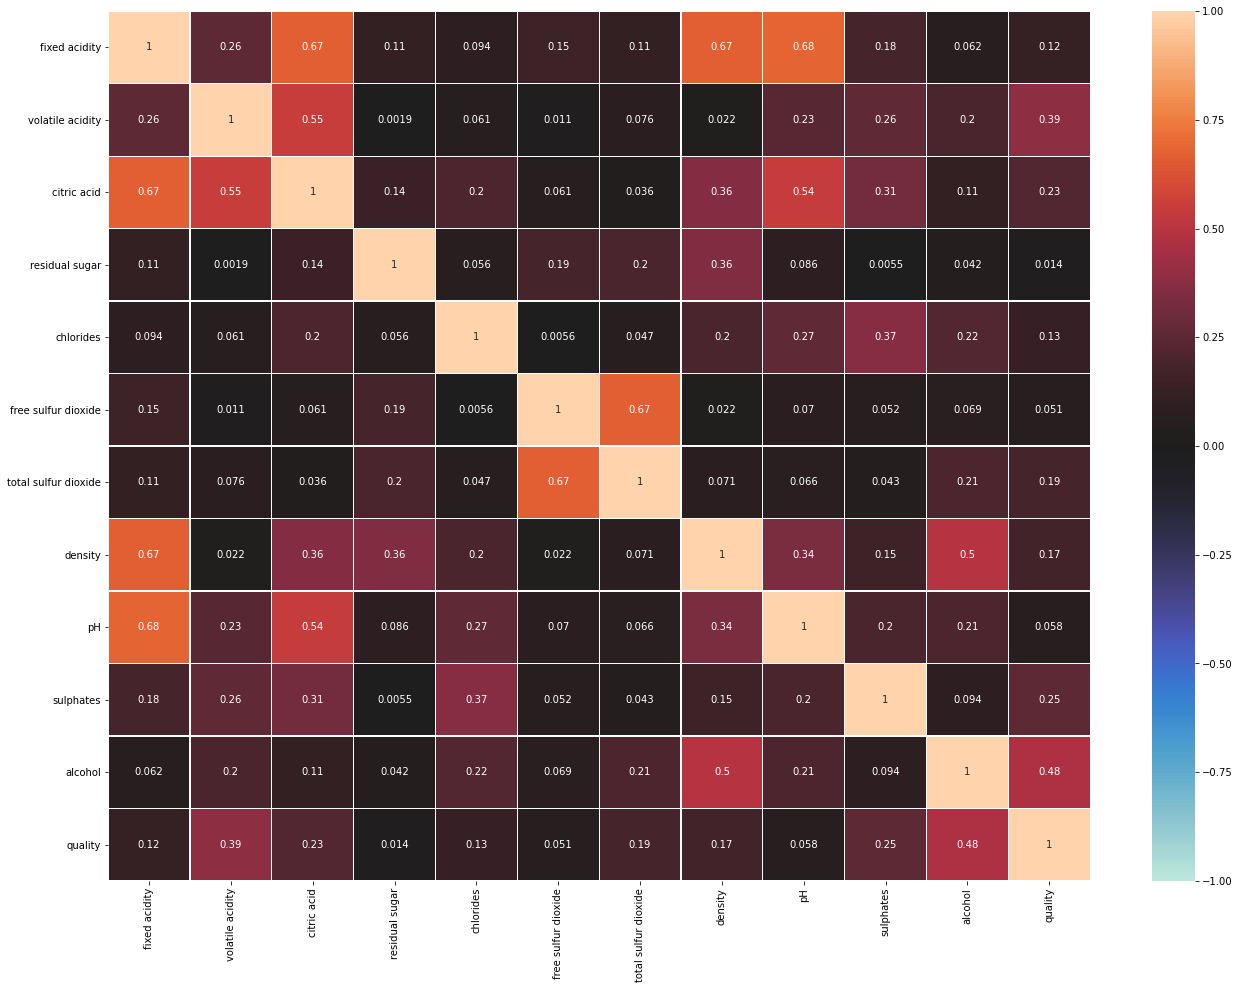

In [7]:
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

# checking corerelation among features and labels

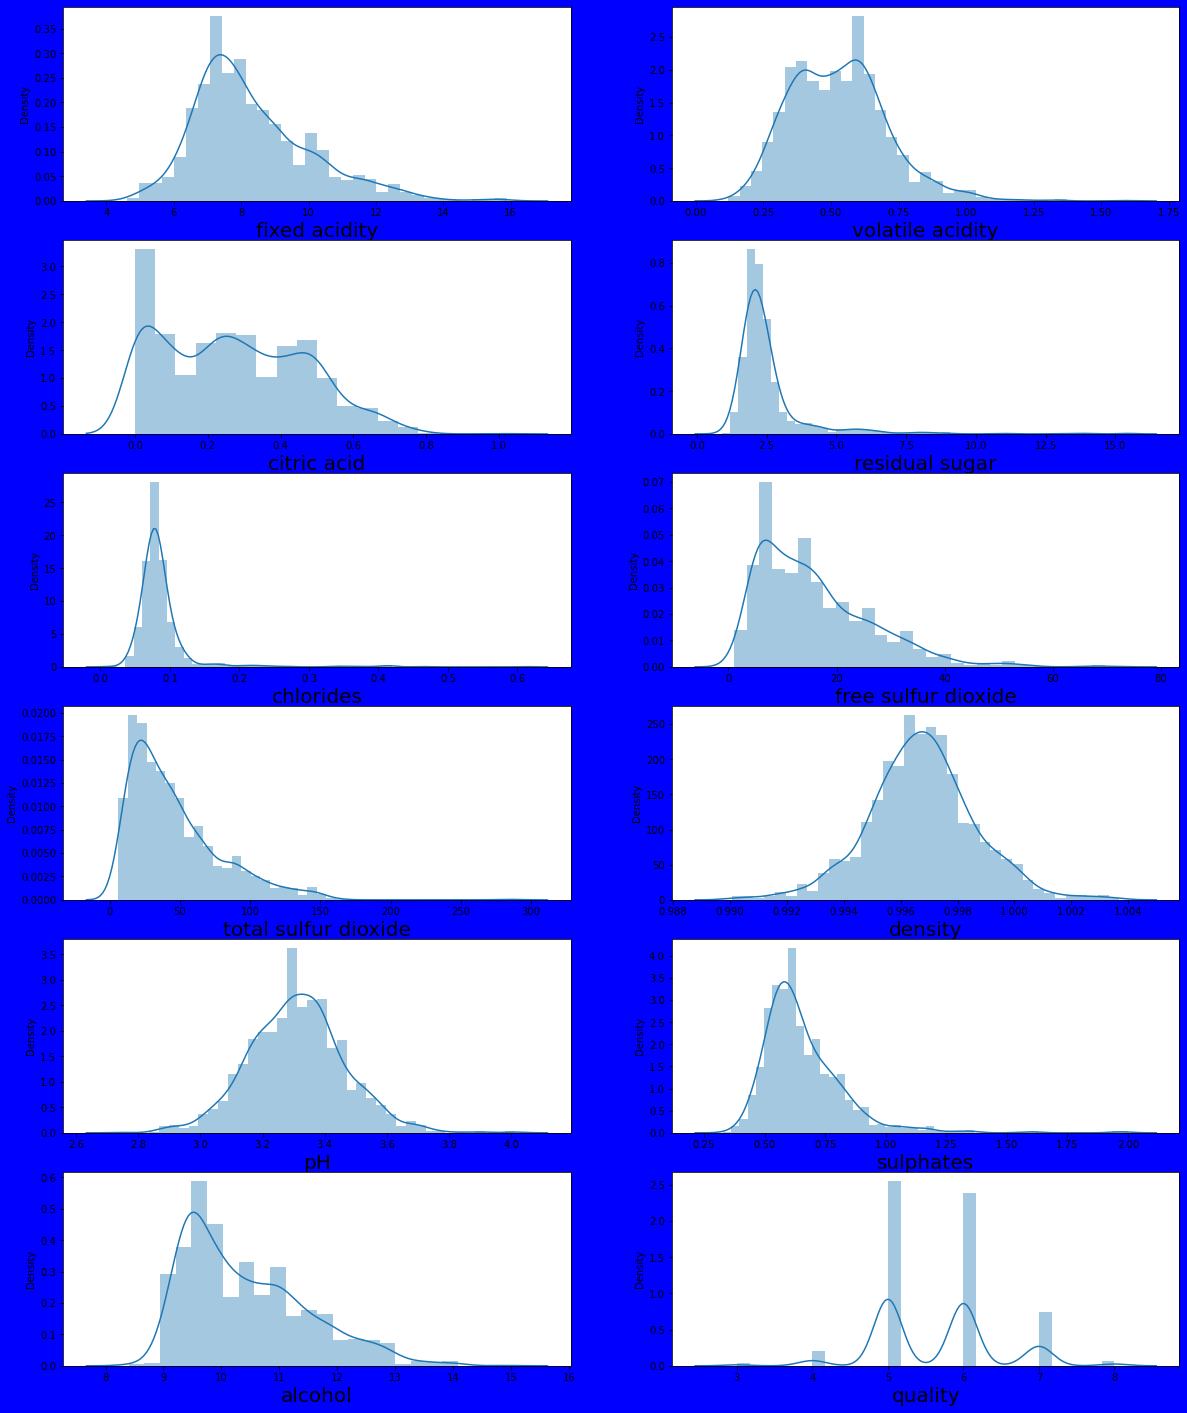

In [8]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# checking skewness inthe dataset

In [9]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df.quality=df["quality"].replace([3,4,5,6],0)

In [11]:
df.quality=df["quality"].replace([7,8],1)

In [12]:
df["quality"].unique()

array([0, 1], dtype=int64)

# replacing quantity with 0 & 1 

<AxesSubplot:ylabel='quality'>

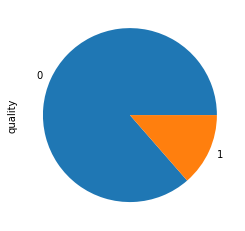

In [13]:
df.quality.value_counts().plot.pie()

# checking weither label is balanced or imbalance

In [14]:
features=['fixed acidity','volatile acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

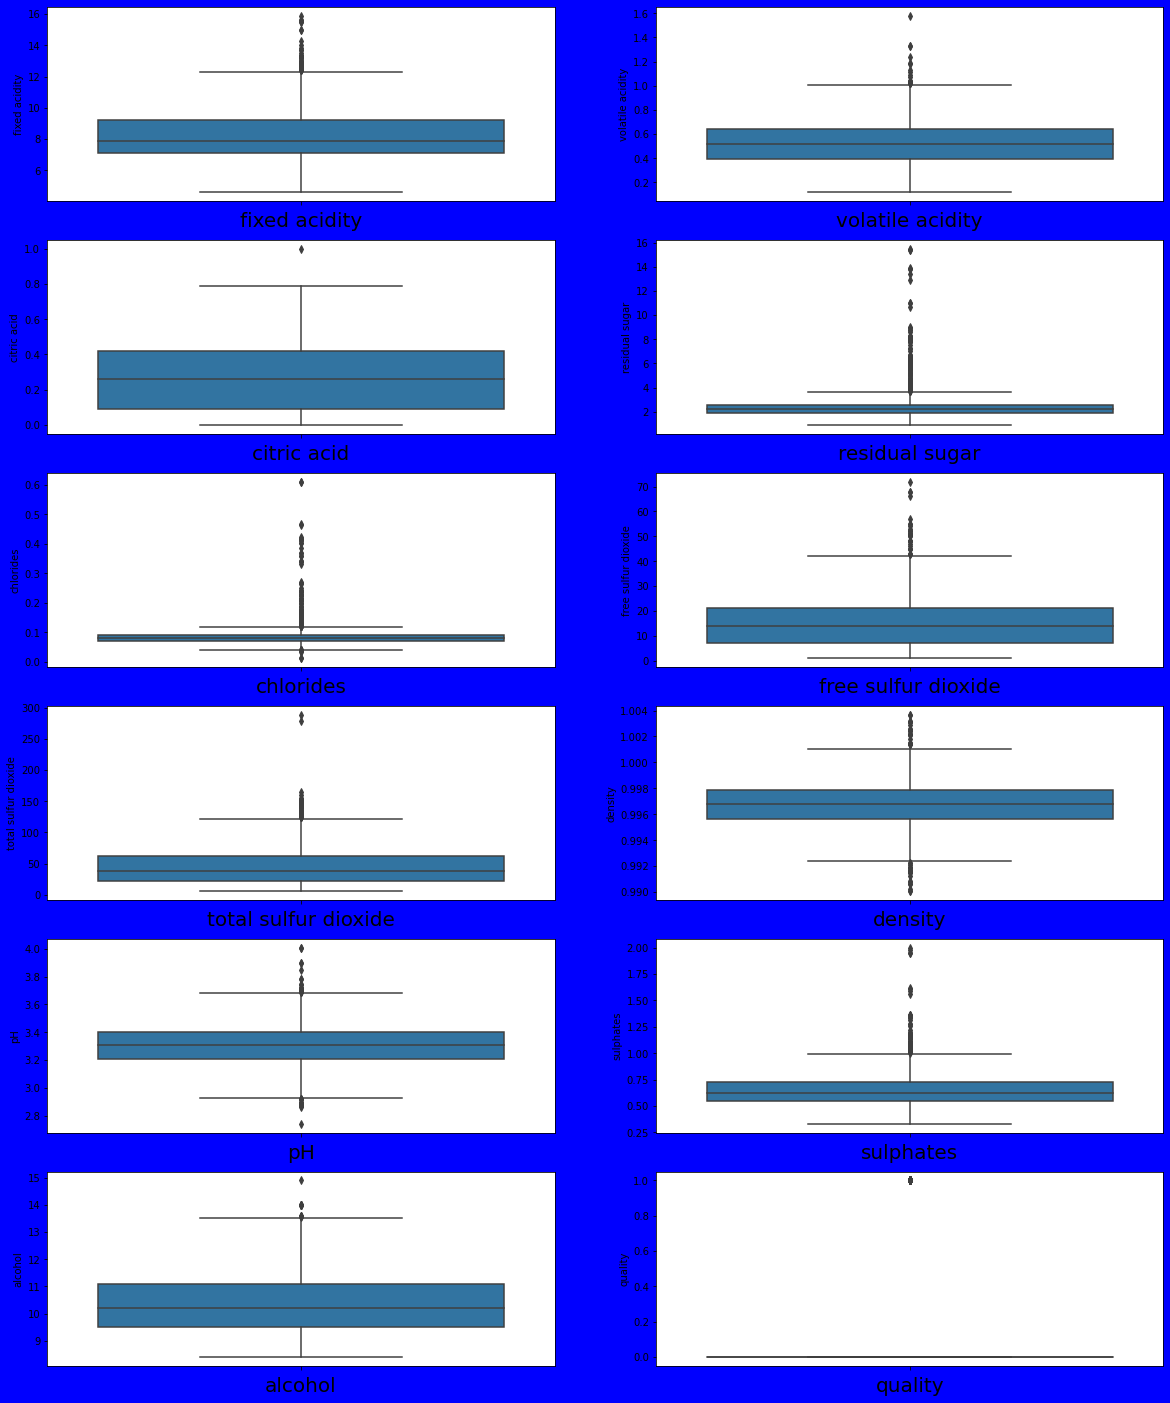

In [15]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# checking outliers in the dataset

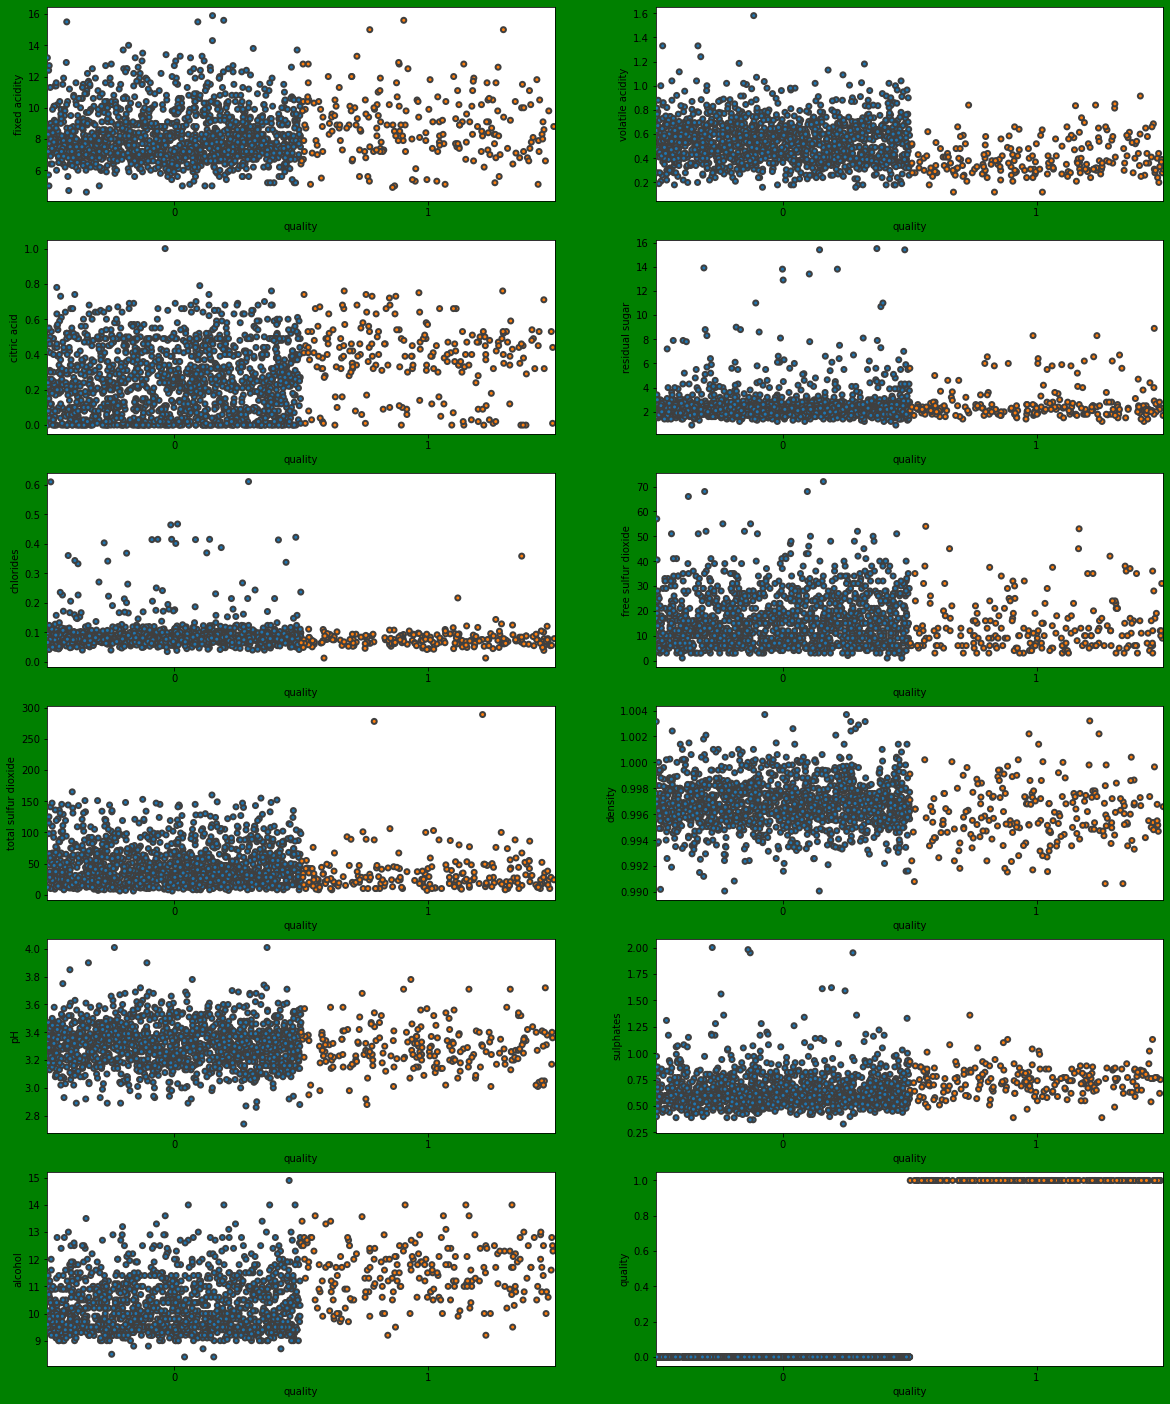

In [16]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.stripplot(x=df['quality'],y=df[column],linewidth=2,jitter=0.5)
    plotnumber+=1
plt.show()

In [21]:
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')


In [22]:
df[features]=scale.fit_transform(df[features].values)
df[features]

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [23]:
df['chlorides']=scale.fit_transform(df[['chlorides']].values)
df['chlorides']

0      -0.172896
1       0.786204
2       0.560696
3      -0.226113
4      -0.172896
          ...   
1594    0.480036
1595   -1.013159
1596   -0.172896
1597   -0.226113
1598   -0.688299
Name: chlorides, Length: 1599, dtype: float64

In [24]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1


In [25]:
ind=[]
for i in features:
    standard=(q1[i]-(1.5*iqr[i]))
    index=np.where(df[i]<standard)
    df.drop(df.index[index],inplace=True,axis=0)

df.shape

(1531, 12)

In [26]:
for i in features:
    standard=(q3[i]+(1.5*iqr[i]))
    index=np.where(df[i]>standard)
    df.drop(df.index[index],inplace=True,axis=0)
df.shape

(1479, 12)

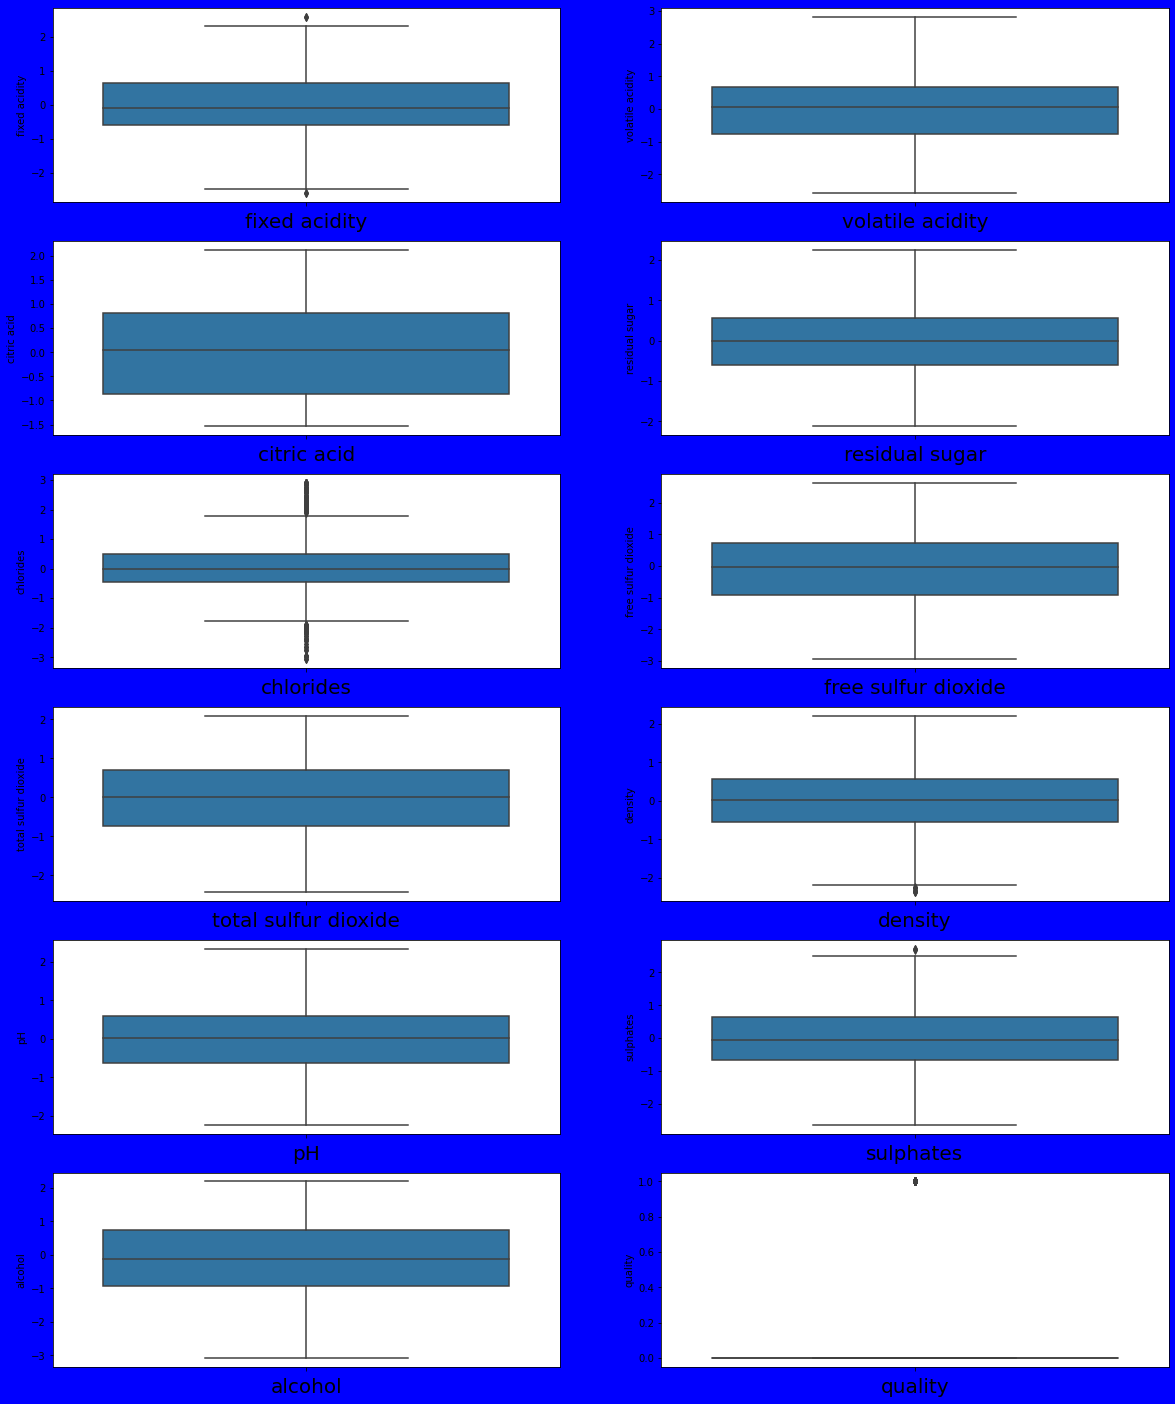

In [27]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
df.skew()

fixed acidity           0.190284
volatile acidity       -0.037944
citric acid            -0.004706
residual sugar          0.160021
chlorides               0.327507
free sulfur dioxide    -0.036374
total sulfur dioxide   -0.010112
density                 0.023673
pH                      0.005968
sulphates               0.101007
alcohol                 0.115631
quality                 2.222978
dtype: float64

# i have removed as the maximum outliers from my data set futher removal will make dataloss more than 10% that is why i dint remove the chlorides outliers

In [167]:
from sklearn.utils import resample

In [168]:
z=df[df.quality==0]
a=df[df.quality==1]

In [169]:
up=resample(a,replace=True,n_samples=len(z),random_state=0)

In [170]:
new_df=pd.concat([z,up])
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,0
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,0
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,0
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,0
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,0
...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.097054,-1.320459,0.724060,-0.008632,-1.295247,-1.107886,-1.794522,-0.731200,0.017044,0.395140,0.888124,1
407,1.797701,-0.751558,1.775102,0.959042,0.599964,-0.140581,-0.301698,1.501727,-0.844397,0.031749,0.568428,1
857,0.097054,-1.708506,0.444255,0.433471,-0.335468,0.291904,0.339408,-0.420571,0.593038,0.978451,0.960555,1
1208,-0.592974,-0.957911,0.988411,-0.185690,-0.280297,0.928171,0.244351,-0.741941,0.593038,1.298474,0.734558,1


# balancing the label by upsampling

<AxesSubplot:>

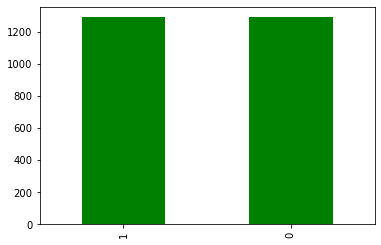

In [171]:
new_df.quality.value_counts().plot.bar(color='green')

In [172]:
y=new_df['quality']
x=new_df.drop(columns='quality')


In [173]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [174]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

# using decison tree 

In [176]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [177]:
y_pred = clf.predict(x_test)

In [178]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.9414186799126967

In [179]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       328
           1       0.91      1.00      0.95       317

    accuracy                           0.95       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.95      0.95       645



In [180]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[295  33]
 [  0 317]]


In [181]:
accuracy_score(y_test,y_pred)

0.9488372093023256

# logistic regression

In [182]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [183]:
y_pred=lr.predict(x_test)

In [184]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       328
           1       0.82      0.86      0.84       317

    accuracy                           0.84       645
   macro avg       0.84      0.84      0.84       645
weighted avg       0.84      0.84      0.84       645



In [185]:
cross_val_score(lr,x_scaled,y,cv=5).mean()

0.7970941521788214

In [186]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [187]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[266  62]
 [ 43 274]]


# gbdt

In [188]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [190]:
y_pred=gd.predict(x_test)

In [191]:
cross_val_score(gd,x_scaled,y,cv=5).mean()

0.9029976668924512

In [192]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [193]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       328
           1       0.89      0.99      0.94       317

    accuracy                           0.93       645
   macro avg       0.94      0.93      0.93       645
weighted avg       0.94      0.93      0.93       645



In [194]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[289  39]
 [  4 313]]


# knn

In [195]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


y_pred = knn.predict(x_test)

In [196]:
cross_val_score(knn,x_scaled,y,cv=3).mean()

0.8374588262898088

In [197]:
accuracy_score(y_test,y_pred)

0.8821705426356589

In [198]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       328
           1       0.81      0.99      0.89       317

    accuracy                           0.88       645
   macro avg       0.90      0.88      0.88       645
weighted avg       0.90      0.88      0.88       645



In [199]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[256  72]
 [  4 313]]


decision tree is the best model

In [201]:
grid_params= {
    'criterion':['gini','entropy'],
    'max_depth':range(1,20,1),
    'min_samples_leaf':range(1,50,2),
    'min_samples_split':range(1,50,2),
    'random_state':range(0,20,2)
}

In [202]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [203]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 50, 2),
                         'min_samples_split': range(1, 50, 2),
                         'random_state': range(0, 20, 2)})

In [204]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 2}

In [205]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=18,min_samples_leaf=1,min_samples_split=3,random_state=2)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=18, min_samples_split=3, random_state=2)

In [206]:
y_pred = clf.predict(x_test)

In [207]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       328
           1       0.91      1.00      0.95       317

    accuracy                           0.95       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.95      0.95       645



In [218]:
cross_val_score(clf,x_scaled,y,cv=7).mean()

0.9452808076217407

In [219]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[295  33]
 [  0 317]]


In [220]:
accuracy_score(y_test,y_pred)

0.9488372093023256

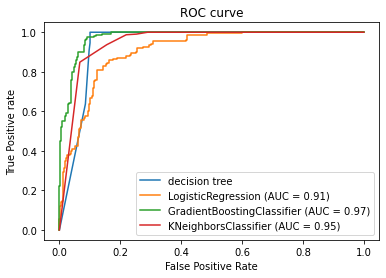

In [221]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(clf,x_test,y_test, label='decision tree')

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gd,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# saving the model

In [222]:
import pickle
filename='wine.pk1'
pickle.dump(clf,open(filename,'wb'))